In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Pranali\Desktop\Pranali_Study\python practice\Project\COVID19_Countrywise_Analysis.csv")



In [3]:
df.shape

(10, 5)

In [4]:
df.info

<bound method DataFrame.info of    Country  Confirmed  Deaths  Recovered  Active
0      USA   34000000  610000   33000000  390000
1    India   31000000  410000   30000000  590000
2   Brazil   19000000  530000   18000000  470000
3   Russia    6000000  150000    5800000   50000
4       UK    7000000  130000    6800000   70000
5   France    6500000  120000    6400000  -20000
6    Italy    4700000  135000    4600000  -35000
7    Spain    4500000  115000    4400000  -15000
8  Germany    4000000   90000    3900000   10000
9   Canada    2000000   35000    1950000   15000>

In [5]:
pd.isnull(df).sum()

Country      0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,1.000000e+01,10.000000,1.000000e+01,10.000000
mean,1.187000e+07,232500.000000,1.148500e+07,152500.000000
std,1.182568e+07,204154.761558,1.142279e+07,235256.951722
min,2.000000e+06,35000.000000,1.950000e+06,-35000.000000
25%,4.550000e+06,116250.000000,4.450000e+06,-8750.000000
50%,6.250000e+06,132500.000000,6.100000e+06,32500.000000
75%,1.600000e+07,345000.000000,1.520000e+07,310000.000000
max,3.400000e+07,610000.000000,3.300000e+07,590000.000000


In [8]:
df.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

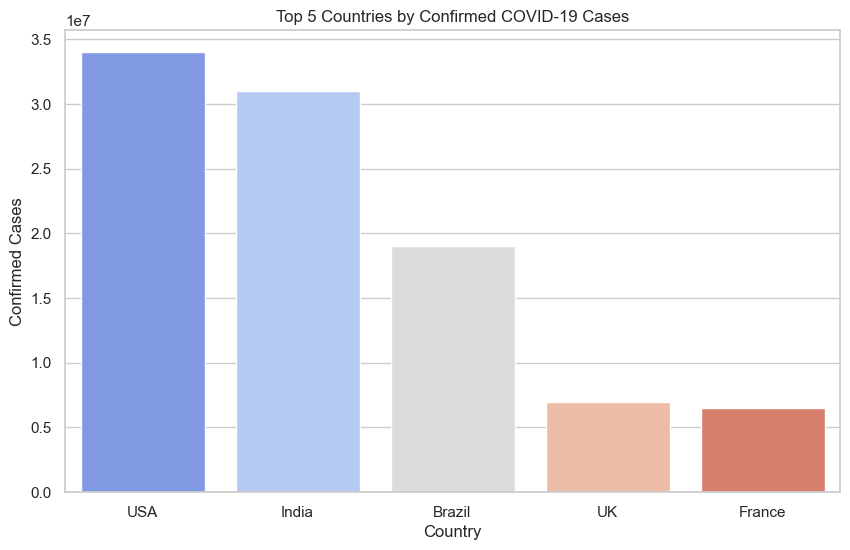

In [22]:
top5 = df.sort_values(by='Confirmed', ascending=False).head(5)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Confirmed', hue='Country', data=top5, palette='coolwarm', legend=False)

plt.title('Top 5 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')

plt.show()



In [24]:
df['Death Rate'] = df['Deaths']/df['Confirmed']
print(df['Death Rate'])

0    0.017941
1    0.013226
2    0.027895
3    0.025000
4    0.018571
5    0.018462
6    0.028723
7    0.025556
8    0.022500
9    0.017500
Name: Death Rate, dtype: float64


In [36]:
top5_death_rate = df.sort_values(by='Death Rate',ascending=False).head(5)

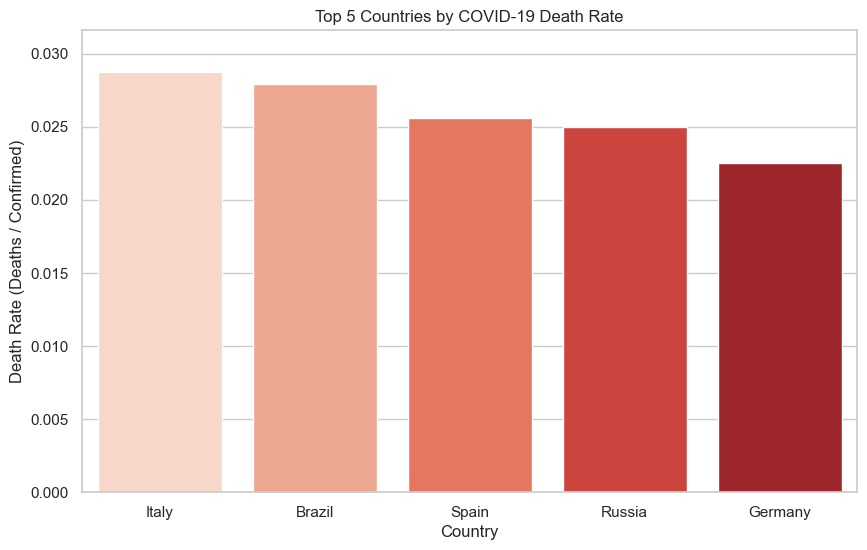

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Death Rate', data=top5_death_rate, hue='Country', palette='Reds', legend=False)

plt.title('Top 5 Countries by COVID-19 Death Rate')
plt.xlabel('Country')
plt.ylabel('Death Rate (Deaths / Confirmed)')
plt.ylim(0, top5_death_rate['Death Rate'].max() * 1.1)

plt.show()


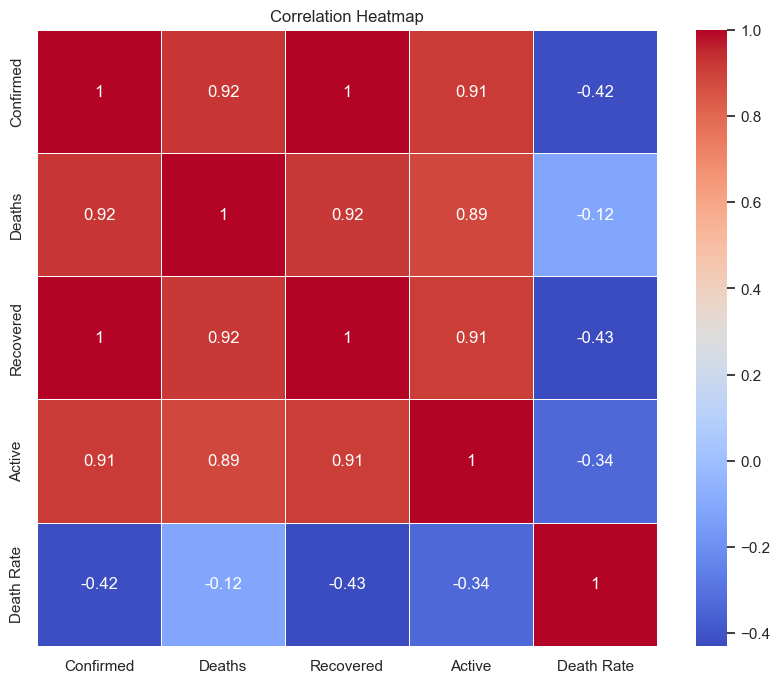

In [41]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

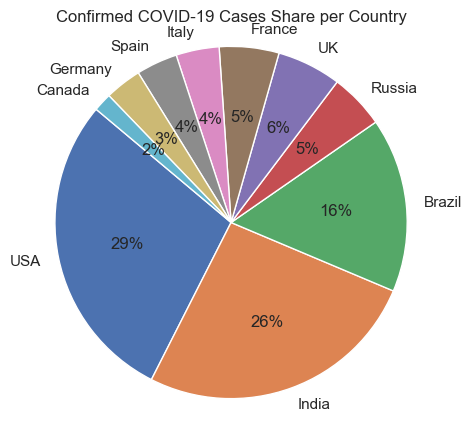

In [19]:
plt.figure(figsize=(5,5))
plt.pie(df['Confirmed'], labels=df['Country'], autopct='%1.0f%%', startangle=140)
plt.title('Confirmed COVID-19 Cases Share per Country')
plt.axis('equal') 
plt.show()
